In [1]:
'''
Classification: Support Vector Machine
Dataset : bank_transactions_data_2.csv
Implement Support Vector Machine for a dataset and compare the accuracy by applying the 
following kernel functions: i. Linear ii. Polynomial 
'''

'\nClassification: Support Vector Machine\nDataset : bank_transactions_data_2.csv\nImplement Support Vector Machine for a dataset and compare the accuracy by applying the following kernel functions: i. Linear ii. Polynomial \n'

In [24]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv(r'LP-1_Dataset\SVM\bank_transactions_data_2.csv')

data.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [8]:
# encode categorical columns

label_encoders = {}
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [9]:
# selecting relevant features
X = data[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']]
y = data['TransactionType']

In [11]:
# standardize numerical features 
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:
# split into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
# train SVM with linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

In [16]:
# train SVM with polynomial kernel
svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)

In [21]:
# Evaluate and compare models
print("Linear Kernel Evaluation:")
print("Kernel Accuracy: ", accuracy_score(y_test, y_pred_linear))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))
print("Classification Report:\n", classification_report(y_test, y_pred_linear))

Linear Kernel Evaluation:
Kernel Accuracy:  0.7811671087533156
Confusion Matrix:
 [[  0 165]
 [  0 589]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       165
           1       0.78      1.00      0.88       589

    accuracy                           0.78       754
   macro avg       0.39      0.50      0.44       754
weighted avg       0.61      0.78      0.69       754



C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
# Evaluate and compare models
print("Polynomial Kernel Evaluation:")
print("Kernel Accuracy: ", accuracy_score(y_test, y_pred_poly))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_poly))
print("Classification Report:\n", classification_report(y_test, y_pred_poly))

Polynomial Kernel Evaluation:
Kernel Accuracy:  0.7811671087533156
Confusion Matrix:
 [[  0 165]
 [  0 589]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       165
           1       0.78      1.00      0.88       589

    accuracy                           0.78       754
   macro avg       0.39      0.50      0.44       754
weighted avg       0.61      0.78      0.69       754



C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


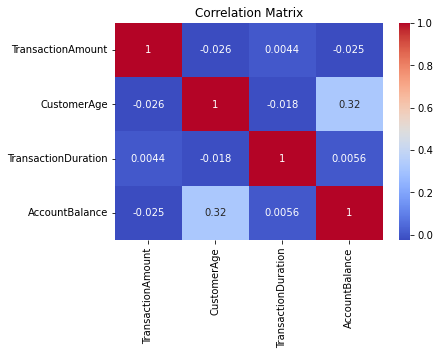

In [27]:
sns.heatmap(data[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()